# 🔵 TP2 | Inteligência Artificial: Model LifeCycle

**Instruções de entrega:**

* Todas as respostas (textuais ou código-fonte) devem estar contidas em um notebook do Google Colab.
* O nome do notebook deve estar no formato nome_sobrenome_DR1_TP2.
* Respostas textuais devem ser respondidas em markdowns e respostas de código-fonte devem ser respondidas em seções de código-fonte no Google Colab.
* Identifique claramente cada exercício e sua resposta.
* Certifique-se que qualquer código-fonte esteja executando corretamente no Google Colab.
* No moodle, apenas um pdf deve ser postado contendo o link para o Google Colab.

## ⤵️ Imports

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_wine, load_breast_cancer
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

In [ ]:
wine = load_wine()
breast_cancer = load_breast_cancer()

## ⏳ Preparação do Conjunto de Dados

#### 📍 **Exercício 01:**
Escreva uma função chamada preparar_dataset_sklearn, a qual recebe como parâmetro um dos Conjunto de Dados (datasets) do sklearn e retorna um DataFrame pandas onde a última coluna é o target e as demais colunas são os atributos.

In [ ]:
def preparar_dataset_sklearn(dataset: any) -> pd.DataFrame:
  data = dataset.data
  target = dataset.target
  df = pd.DataFrame(data, columns=dataset.feature_names)
  df['target'] = target
  return df

***

#### 📍 **Exercício 02:**
Considere uma versão modificada da função do Exercício 1 chamada preparar_dataset. Assuma que tal função também pode receber um arquivo csv, ao invés de um dataset sklearn, como entrada. Responda as questões abaixo:

* Quais os parâmetros da função preparar_dataset? Justifique sua resposta.
* Descreva os passos executados pela função até retornar o DataFrame.

In [ ]:
def preparar_dataset(data:any) -> pd.DataFrame:
  return pd.read_csv(data)

**❓ Quais os parâmetros da função preparar_dataset? Justifique sua resposta.**

🗣️ A função *preparar_dataset(csv_file_path:string)* recebe como parâmetro o caminho do arquivo csv. Dessa forma, a função faz a leitura do arquivo e devolve um pd.DataFrame.

<br>

**❓ Descreva os passos executados pela função até retornar o DataFrame.**

🗣️ A função é bem simples:
1. Recebe o caminho do arquivo como parâmetro;
2. Faz a leitura do arquivo CSV;
3. Devolve do pd.DataFrame.

***

## 🛠️ Construção de Classificador K-NN

#### 📍 **Exercício 03:**
Escreva uma função chamada construir_classificador_knn. A função recebe um DataFrame pandas contendo o Conjunto de Dados obtido do Exercício 1, o valor do parâmetro K do K-NN e o tamanho do conjunto de treinamento em porcentagem. A função retorna um modelo classificador K-NN treinado e pronto para realizar previsões e o conjunto de teste.

In [ ]:
def construir_classificador_knn(data: pd.DataFrame, k:int, train_size:float):
  train_f, test_f, train_t, test_t = train_test_split(data.drop('target', axis=1), data['target'], train_size=train_size, stratify=data['target'])
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(train_f, train_t)
  return knn, test_f, test_t

***

#### 📍 **Exercício 04:**
Considere uma versão modificada da função do Exercício 3 chamada construir_classificador. Considere também que existem diversos outros métodos de Classificação para Aprendizagem de Máquina diferentes do K-NN e que cada método possui diferentes parâmetros em quantidades diferentes. Um dos parâmetros da função construir_classificador é uma string contendo o tipo de classificador. Responda as questões abaixo:

* Quais os parâmetros da função construir_classificador? Indique na sua resposta como você resolveria o problema de cada classificador possuir parâmetros diferentes.
* Descreva os passos executados pela função até retornar o modelo Classificador.

**❓ Quais os parâmetros da função construir_classificador? Indique na sua resposta como você resolveria o problema de cada classificador possuir parâmetros diferentes.**

🗣️ A função *construir_calssificador(modelo:string, params:dict)* receberia como parâmetro:
* O modelo utilizado
* Um dicionário com os parâmetros personalizados

<br>

**❓ Descreva os passos executados pela função até retornar o modelo Classificador.**

🗣️ Antes de tudo, vale ressaltar que o dicionário terá de ser padronizado, com os nomes da variáveis bem definidos e claros:
1. A função recebe o modelo e o dicionário com os parâmetros personalizados;
2. Em um dicionário (interno) busca a classe do modelo que precisa ser utilizado;
3. Passa os respectivos parâmetros para o modelo;
4. Devolve o modelo criado.

***

## 📝 Avaliação de Classificador K-NN

#### 📍 **Exercício 05:**
Escreva uma função chamada avaliar_acuracia_knn. A função recebe um modelo K-NN treinado a partir da função implementada no Exercício 3, um conjunto de teste e um valor N de repetições como entrada e retorna a médias das acurácias para N repetições como saída.

In [ ]:
def avaliar_acuracia_knn(knn:KNeighborsClassifier, test_f:np.array, test_t:np.array, n:int):
  accs = []
  for i in range(n):
    pred = knn.predict(test_f)
    acc = accuracy_score(test_t, pred)
    accs.append(acc)
  return np.array(accs).mean()

***

#### 📍 **Exercício 06:**
A função avaliar_acuracia_knn poderia avaliar de maneira eficaz um Regressor K-NN? Justifique sua resposta.

**❓ A função avaliar_acuracia_knn poderia avaliar de maneira eficaz um Regressor K-NN? Justifique sua resposta.**

🗣️ De maneira eficaz, não. Cada modelo tem uma forma específica de avaliação. Claro que, de alguma maneira, poderia entre um e outro modelo, poderia avaliar bem, mas não seria algo completamente confiável.

***

## 🔮 Previsões e Avaliação com Classificador K-NN

#### 📍 **Exercício 07:**
Utilize as três funções implementadas no Exercício 1, Exercício 3 e Exercício 5 para avaliar a acurácia média para um mínimo de 1000 repetições dos datasets wine e breast_cancer do sklearn. Apresente o gráfico Elbow para cada dataset.

🗣️ Imagino que o gráfico de Elbow seria válido para a aplicação inicial esperada no TP (com as variações na acurácia por meio de N repetições). Por isso, entendi que o gráfico solicitado não é aplicado no contexto atual.

[0 1 0 2 2 1 0 2 1 2 0 2 2 0 1 2 2 1 2 1 0 1 0 2 2 0 2 2 1 1 1 1 0 0 2 0]


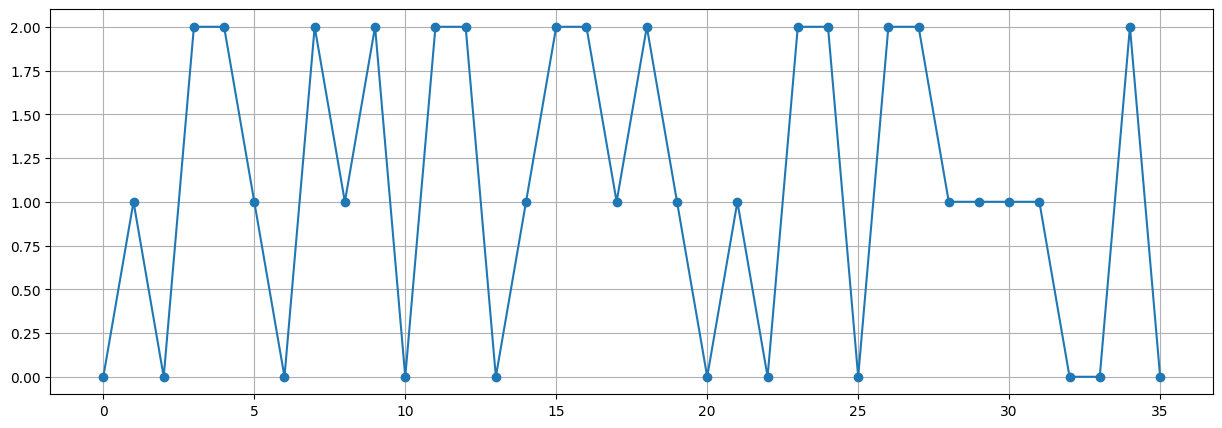

In [ ]:
# Wine
df = preparar_dataset_sklearn(wine)
knn, test_f, test_t = construir_classificador_knn(df, 5, 0.8)
predict = knn.predict(test_f)
accuracy = avaliar_acuracia_knn(knn, test_f, test_t, 1)

print(predict)

plt.figure(figsize=(15, 5))
plt.plot(predict, marker='o')
plt.grid(True)
plt.show()

[1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1
 1 0 0]


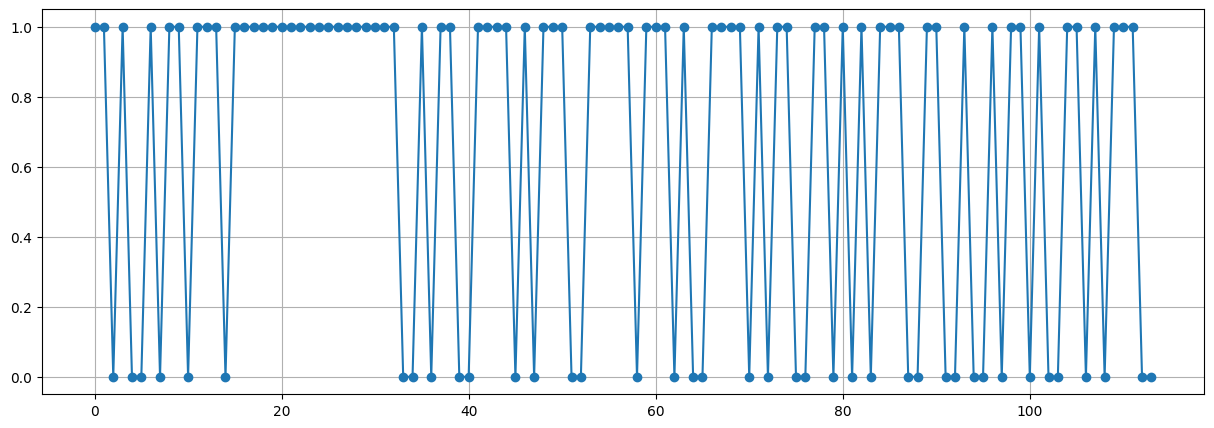

In [ ]:
# Breast Cancer
df = preparar_dataset_sklearn(breast_cancer)
knn, test_f, test_t = construir_classificador_knn(df, 5, 0.8)
predict = knn.predict(test_f)
accuracy = avaliar_acuracia_knn(knn, test_f, test_t, 1)

print(predict)

plt.figure(figsize=(15, 5))
plt.plot(predict, marker='o')
plt.grid(True)
plt.show()

***

#### 📍 **Exercício 08:**
Responda as questões abaixo:

* Qual valor de K melhor prevê o tipo de cancer? Justifique sua resposta.
* Qual valor de K melhor prevê o tipo de vinho? Justifique sua resposta.

In [ ]:
N = 100
K = 10

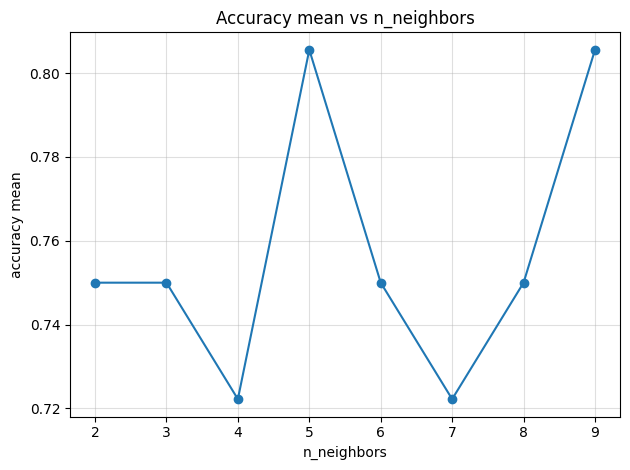

In [ ]:
wine = preparar_dataset_sklearn(wine)

# Wine
acc_mean_list = []
k_list = []
for k in range(2, K):
  acc_list = []
  for i in range(N):
    train_df_iris, test_df_iris, train_target_iris, test_target_iris = \
      train_test_split(
          wine.drop('target', axis=1),
          wine['target'],
          train_size=0.8,
          stratify=wine['target'],
          random_state=42
        )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_df_iris, train_target_iris)
    predict = knn.predict(test_df_iris)

    acc = accuracy_score(test_target_iris, predict)
    acc_list.append(acc)
  acc_mean_list.append(np.array(acc_list).mean())
  k_list.append(k)

acc_list = np.array(acc_list)

x = k_list
y = acc_mean_list

plt.plot(x, y, marker='o')
plt.grid(alpha=0.4)
plt.title('Accuracy mean vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy mean')

plt.tight_layout()
plt.show()

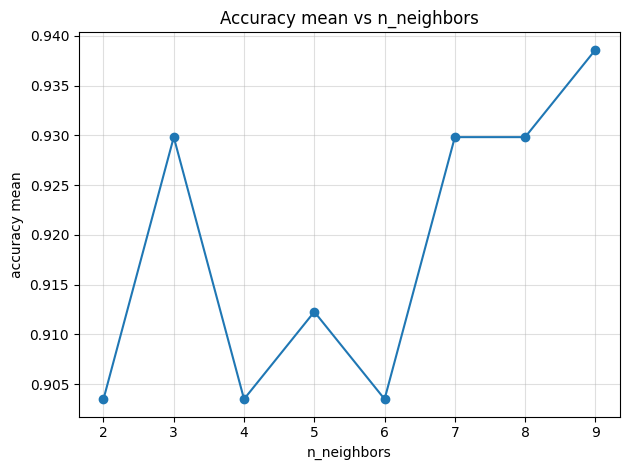

In [ ]:
breast_cancer = preparar_dataset_sklearn(breast_cancer)

# Breast Cancer
acc_mean_list = []
k_list = []
for k in range(2, K):
  acc_list = []
  for i in range(N):
    train_df_iris, test_df_iris, train_target_iris, test_target_iris = \
      train_test_split(
          breast_cancer.drop('target', axis=1),
          breast_cancer['target'],
          train_size=0.8,
          stratify=breast_cancer['target'],
          random_state=42
        )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_df_iris, train_target_iris)
    predict = knn.predict(test_df_iris)

    acc = accuracy_score(test_target_iris, predict)
    acc_list.append(acc)
  acc_mean_list.append(np.array(acc_list).mean())
  k_list.append(k)

acc_list = np.array(acc_list)

x = k_list
y = acc_mean_list

plt.plot(x, y, marker='o')
plt.grid(alpha=0.4)
plt.title('Accuracy mean vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy mean')

plt.tight_layout()
plt.show()

**❓ Qual valor de K melhor prevê o tipo de vinho? Justifique sua resposta.**

🗣️ Baseado no primeiro gráfico acima, tanto o valor 7 quanto o 9 para K prevê cerca de 81% dos tipos de vinho.

<br>

**❓ Qual valor de K melhor prevê o tipo de câncer? Justifique sua resposta.**

🗣️ Baseado no segundo gráfico acima, o valor 9 para K prevê cerca de 93,5% dos tipos de câncer.

***

## 📏 Regressão com K-NN

#### 📍 **Exercício 09:**
Considere o conjunto de dados auto-mpg do arquivo auto-mpg.csv, o qual está contido no Link 1 abaixo (para mais informações sobre o dataset acesse o Link 2 abaixo). Este dataset contém exemplos de atributos de veículos e o consumo de combustível como classe. Construa um Modelo Regressor K-NN para prever o consumo de combustível de um veículo medido em milhas por galão (mpg).

**Obs.:** Não utilize o atributo que contém os nomes dos veículos no seu modelo.

* Link 1: https://github.com/professortiagoinfnet/inteligencia_artificial_model_lifecycle/tree/main/auto%2Bmpg
* Link 2: https://archive.ics.uci.edu/dataset/9/auto+mpg

In [ ]:
features_name = [
    'displacement',
    'mpg',
    'cylinders',
    'horsepower',
    'weight',
    'acceleration',
    'model_year',
    'origin',
    'car_name'
]

data = pd.read_csv(
    'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/refs/heads/main/auto%2Bmpg/auto-mpg.csv',
    names=features_name
)

data.drop('car_name', axis=1, inplace=True)
data

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
data['horsepower'] = data['horsepower'].ffill()

In [ ]:
train_f, test_f, train_t, test_t = train_test_split(data.drop('mpg', axis=1), data['mpg'], test_size=0.2, stratify=data['mpg'])

knn = KNeighborsRegressor(n_neighbors=5)
knn = knn.fit(train_f, train_t)

predicted = knn.predict(test_f)

***

## ✏️ Avaliação de Regressor K-NN

#### 📍 **Exercício 10:**
Avalie o desempenho do algoritmo do Exercício 9 para 10 valores de K diferentes considerando as métricas erro quadrático médio e erro absoluto médio.

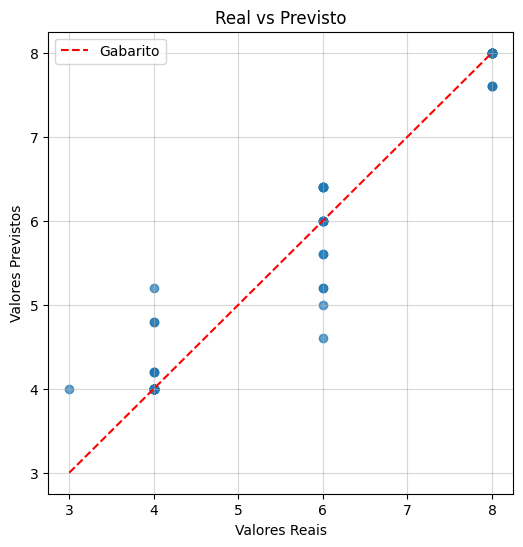

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(test_t, predicted, alpha=0.7)
plt.plot(
    [test_t.min(), test_t.max()],
    [test_t.min(), test_t.max()],
    color='red',
    linestyle='--',
    label='Gabarito'
)

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Real vs Previsto')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [ ]:
mean_absolute_error(test_t, predicted)

0.15500000000000008

In [ ]:
mean_squared_error(test_t, predicted)

0.12100000000000004

***

#### 📍 **Exercício 11:**
A partir das métricas obtidas do Exercício 10, responda com suas palavras. O desempenho do seu algoritmo foi alto ou baixo? Por que?

**❓ O desempenho do seu algoritmo foi alto ou baixo? Por que?**

🗣️ Baseado na análise de acurácia realizada acima (MAE) vemos que quando o modelo não acerta, erra por 0,145 (para mais ou para menos). O mesmo quando rodamos o MSE, que é sensível a outliers: o modelo erra por 0,161.
Quando olhamos esses valores para o nosso contexto, onde a escala do target era de 1 a 8, o modelo está bem preciso, com uma taxa de erro baixa.